<a href="https://colab.research.google.com/github/HektorLin/Trading-Strategies/blob/master/Holdings_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas-datareader
import pandas_datareader as pdr

In [2]:
!pip install stargazer
from stargazer.stargazer import Stargazer

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [61]:
from datetime import datetime, timedelta
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format

import numpy as np
import seaborn as sns
import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
# downlad portfolio data
def yahoo_close (ticker):
  start_time = datetime.strftime(datetime.now() + timedelta(-365), '%Y-%m-%d')
  #start_time = start=datetime(2020, 2, 15)
  data = pdr.get_data_yahoo(symbols=ticker, start=start_time)['Close']
  return data

In [234]:
# define condidates

CNtech_members = ["0700.HK","9988.HK","1810.HK"]
CNpharm_members = ["1177.HK","1093.HK","2269.HK"]

HKprop_members = ["1113.HK","2778.HK","0435.HK"]

HDiv_members = ["1088.HK","2328.HK","0883.HK","1628.HK","0659.HK","1359.HK","2009.HK","0998.HK"]

categories = [CNtech_members, CNpharm_members, 
              HKprop_members, 
              HDiv_members]

# **High Dividends (HDiv)**

In [235]:
focus_group = HDiv_members

In [237]:
# standardized code for get close price for the focus group
protfolio = ["2800.HK"]
protfolio.extend([stock for stock in focus_group])

protfolio_close = [yahoo_close(member) for member in protfolio]
protfolio_close=pd.DataFrame(protfolio_close).transpose()
protfolio_close.columns=protfolio

In [238]:
# create index time-series and return matrix
indexed_port = protfolio_close/protfolio_close.iloc[0,:]*100

port_returns = protfolio_close.pct_change()*100
port_returns.dropna(axis=0,inplace=True)

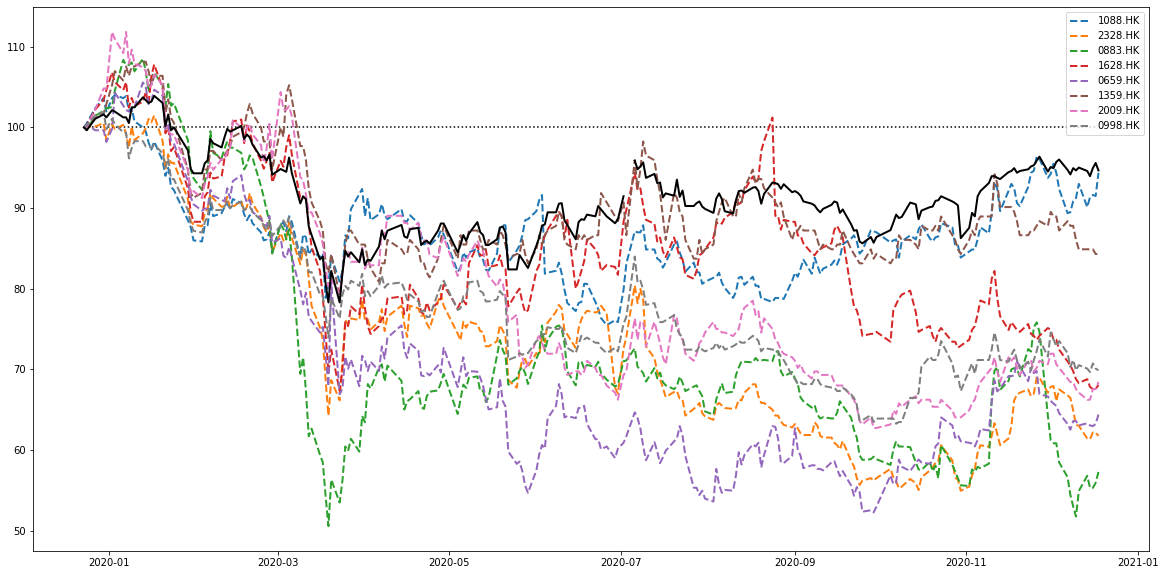

In [239]:
# plot indexed return

#plot indexed

fig,ax = plt.subplots(figsize=(20, 10))
for member in focus_group:
  ax.plot(indexed_port.index, indexed_port[member], linewidth=2, linestyle='--')
ax.plot(indexed_port.index, indexed_port['2800.HK'], color='black', linewidth=2, linestyle='-')
ax.hlines(y=100,xmin=indexed_port.index[0],xmax=indexed_port.index[-1], color='black', linestyle=(':'))

ax.legend(focus_group)

In [240]:
# Save returns for the focus group
HDiv_returns = port_returns

In [226]:
# define Rolling Window CAPM

def _CAPM_coefficients (y,X):
  y = y.copy()
  X = X.copy()
  X = sm.add_constant(X)
  model = sm.OLS(y, X).fit()
  alpha,beta = model.params
  return alpha,beta

def Rolling_Alpha (y,X,window_size):
  periods = len(y) - window_size + 1
  rolling_alpha = []
  for i in range(0,periods):
    reg_y = y[i:i+window_size]
    reg_X = X[i:i+window_size]
    alpha, beta = _CAPM_coefficients(reg_y,reg_X)
    rolling_alpha.append(alpha)
#  rolling_alpha = pd.DataFrame([index[-periods-1:-1],rolling_alpha]).transpose()
#  rolling_alpha.columns = ["Date",y.name]
  return rolling_alpha

In [241]:
# Rolling Alpha Table
window_size = 120
alpha = []
for member in port_returns.columns[1:]:
  #print(member)
  alpha.append(Rolling_Alpha(port_returns[member],port_returns["2800.HK"],window_size))
time_index = port_returns.index[-(len(port_returns)-window_size+1):]
alpha = pd.DataFrame(alpha).transpose()
alpha.columns = port_returns.columns[1:]
alpha = pd.concat([alpha,pd.DataFrame(time_index.values,columns=["Date"])],axis=1)
alpha.set_index("Date",inplace=True)

Text(0.5, 1.0, 'Rolling Alpha')

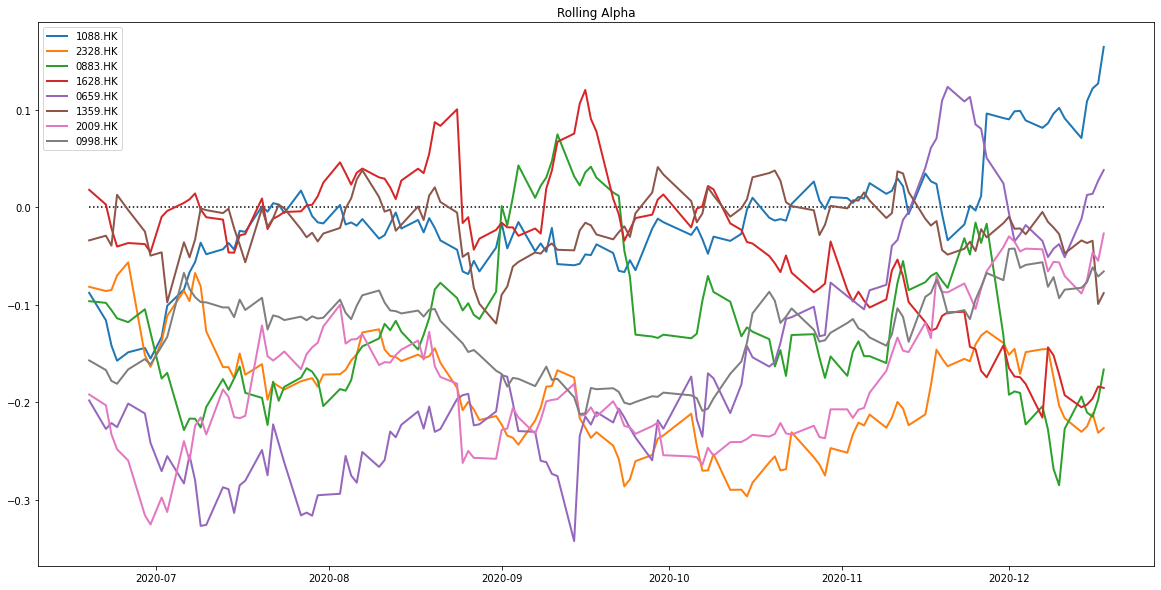

In [242]:
#plot indexed

fig,ax = plt.subplots(figsize=(20, 10))
for member in focus_group:
  ax.plot(alpha.index, alpha[member], linewidth=2, linestyle='-')
ax.hlines(y=0,xmin=alpha.index[0],xmax=alpha.index[-1], color='black', linestyle=(':'))
ax.legend(focus_group)
plt.title("Rolling Alpha")

# **CN-BioTech (CNpharm)**

In [243]:
focus_group = CNpharm_members

In [244]:
# standardized code for get close price for the focus group
protfolio = ["2800.HK"]
protfolio.extend([stock for stock in focus_group])

protfolio_close = [yahoo_close(member) for member in protfolio]
protfolio_close=pd.DataFrame(protfolio_close).transpose()
protfolio_close.columns=protfolio

In [245]:
# create index time-series and return matrix
indexed_port = protfolio_close/protfolio_close.iloc[0,:]*100

port_returns = protfolio_close.pct_change()*100
port_returns.dropna(axis=0,inplace=True)

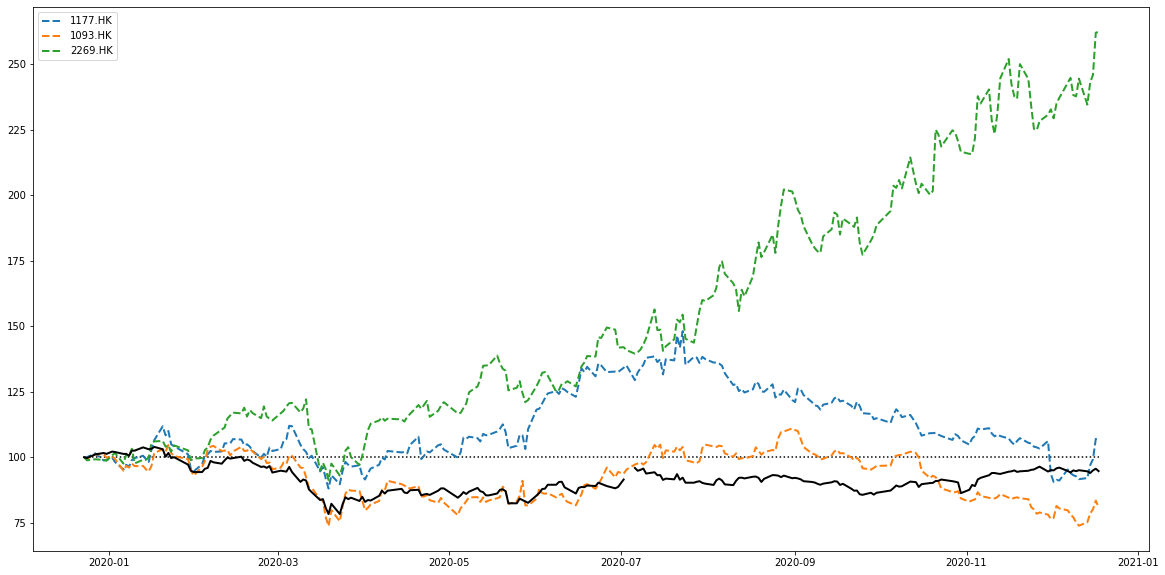

In [246]:
# plot indexed return

#plot indexed

fig,ax = plt.subplots(figsize=(20, 10))
for member in focus_group:
  ax.plot(indexed_port.index, indexed_port[member], linewidth=2, linestyle='--')
ax.plot(indexed_port.index, indexed_port['2800.HK'], color='black', linewidth=2, linestyle='-')
ax.hlines(y=100,xmin=indexed_port.index[0],xmax=indexed_port.index[-1], color='black', linestyle=(':'))

ax.legend(focus_group)

Old codes

In [ ]:
# define themes

themes = {}
themes.update({"CNtech":["0700.HK","9988.HK","1810.HK"]})
themes.update({"HKprop":["1113.HK","0435.HK","2778.HK"]})

In [ ]:
for keys in themes:
  port[keys] = port[themes[keys]].mean(axis=1)
  indexed_port[keys] = indexed_port[themes[keys]].mean(axis=1)
  port.drop(labels=themes[keys],axis=1,inplace=True)
  indexed_port.drop(labels=themes[keys],axis=1,inplace=True)

In [ ]:
port

,2800.HK,1088.HK,0388.HK,1308.HK,3141.HK,CNtech,HKprop
Date,,,,,,,
2020-02-18,-1.598575,-1.519332,-1.026389,-0.314793,0.123448,-2.348037,-0.920081
2020-02-19,0.541515,-0.841514,0.148146,3.473683,0.123307,0.417316,0.289007
2020-02-20,-0.359068,0.707210,0.369822,-0.305185,0.123156,0.187547,-0.961506
2020-02-21,-0.900901,-1.123594,-1.400143,-1.122455,0.245996,-1.660644,-1.146651
2020-02-24,-1.636366,-1.278411,-2.541113,-2.786373,0.368107,-3.089590,-0.451592
...,...,...,...,...,...,...,...
2020-06-26,-0.950871,-1.147536,0.503463,0.738921,-0.122853,-2.762562,-0.287247
2020-06-29,-0.959999,0.829183,0.187854,3.300727,0.430502,-1.539778,-0.570302
2020-06-30,0.565426,-0.328947,3.125000,-2.130170,0.061238,0.485781,0.212978


In [ ]:
#regress over index

def CAPM_coefficients (y,X):
  y = y.copy()
  X = X.copy()
  X = sm.add_constant(X)
  model = sm.OLS(y, X).fit()
  alpha,beta = model.params
  return alpha,beta

def CAPM_model (y,X):
  y = y.copy()
  X = X.copy()
  X = sm.add_constant(X)
  model = sm.OLS(y, X).fit()
  y.rename('target')
  X.columns=['alpha','beta']

  #alpha,beta = model.params
  return model

In [ ]:
# CAPM

CAPMtable = [CAPM_coefficients(port[regressor],port['2800.HK']) for regressor in port.columns[1:]]
CAPMtable = pd.DataFrame(CAPMtable).transpose()
CAPMtable.columns = port.columns[1:]
CAPMtable.index = ['alpha','beta']
CAPMtable

,1088.HK,0388.HK,1308.HK,3141.HK,CNtech,HKprop
alpha,-0.017922,0.325349,-0.050259,0.008916,0.202864,-0.043836
beta,0.634507,0.706202,0.661909,0.096862,0.802049,0.900143


Text(0.5, 1.0, 'Holdings Performance')

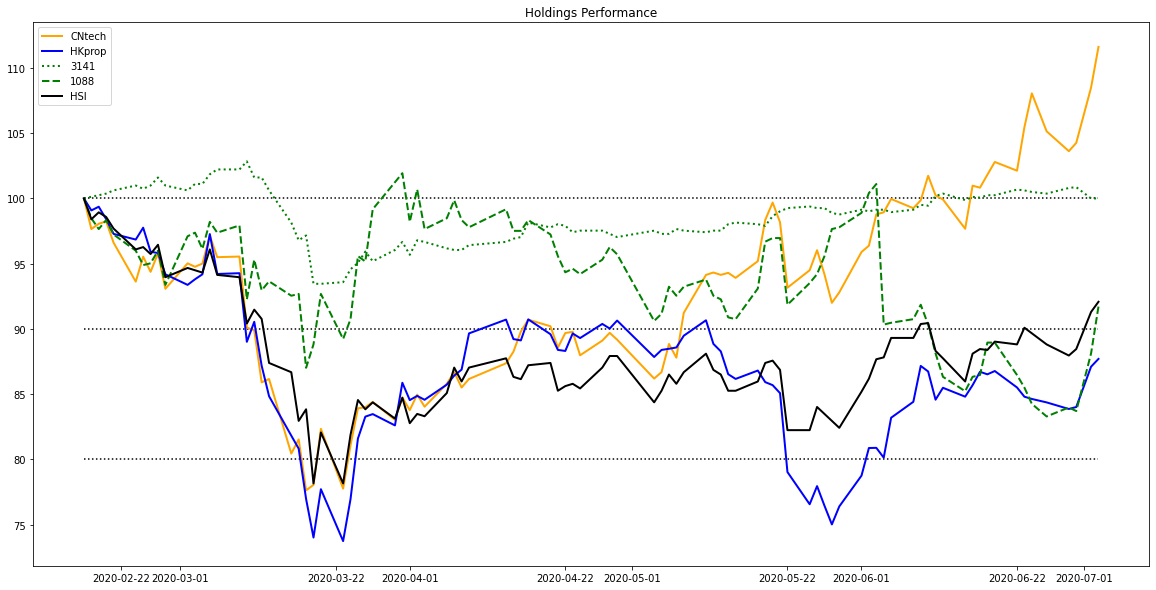

In [ ]:
#plot indexed

fig,ax = plt.subplots(figsize=(20, 10))

ax.plot(indexed_port.index, indexed_port['CNtech'], color='orange', linewidth=2, linestyle='-')
ax.plot(indexed_port.index, indexed_port['HKprop'], color='blue', linewidth=2, linestyle='-')

ax.plot(indexed_port.index, indexed_port['3141.HK'], color='green', linewidth=2, linestyle=':')
ax.plot(indexed_port.index, indexed_port['1088.HK'], color='green', linewidth=2, linestyle='--')


ax.plot(indexed_port.index, indexed_port['2800.HK'], color='black', linewidth=2, linestyle='-')

ax.hlines(y=100,xmin=indexed_port.index[0],xmax=indexed_port.index[-1], color='black', linestyle=(':'))
ax.hlines(y=90,xmin=indexed_port.index[0],xmax=indexed_port.index[-1], color='black', linestyle=(':'))
ax.hlines(y=80,xmin=indexed_port.index[0],xmax=indexed_port.index[-1], color='black', linestyle=(':'))

ax.legend(['CNtech','HKprop','3141',"1088",'HSI'])

plt.title("Holdings Performance")

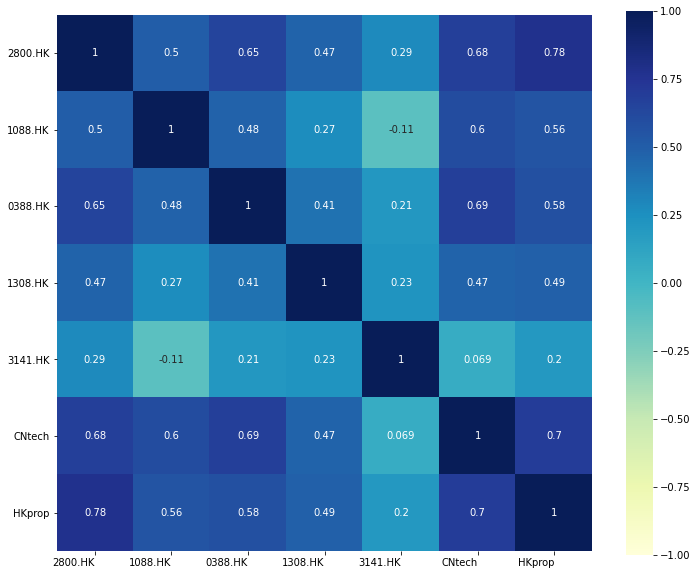

In [ ]:
corr = port.corr()

f, ax = plt.subplots(figsize=(12, 10))

ax = sns.heatmap(
    corr,
    annot=True,  
    vmin=-1, vmax=1, center=0,
    cmap="YlGnBu",
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=0,
    horizontalalignment='right'
)

ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0,
    horizontalalignment='right'
);